# PCA: batch processing and online-PCA

## 3.1 Preprocessing

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

### (a) Loading the dataset, computing and plotting the first two Principal Components.

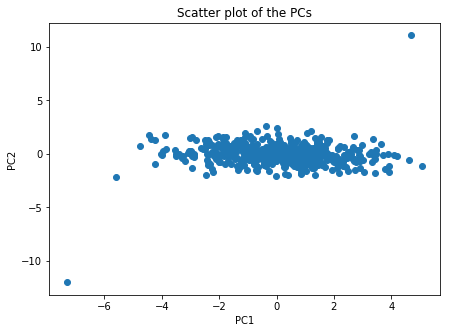

In [2]:
data2D = pd.read_csv("pca2.csv", sep=",")
meanVector2D = np.mean(data2D)
centeredData2D = data2D - meanVector2D
covarianceMatrix2D = np.cov(centeredData2D.T)
eigenvalues2D, eigenvectors2D = np.linalg.eig(covarianceMatrix2D)
orderedIndices2D = np.argsort(eigenvalues2D)[::-1]
orderedEigenvalues2D = eigenvalues2D[orderedIndices2D]
orderedEigenvectors2D = eigenvectors2D[orderedIndices2D]
pcaData2D = np.dot(centeredData2D, orderedEigenvectors2D)

# Plotting the results.
plt.figure(figsize=(7,5))
plt.scatter(pcaData2D[:,0], pcaData2D[:,1])
plt.title("Scatter plot of the PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The data looks like one bigger cluster and some outliers.

### (b) Removing required observations and redoing the steps.

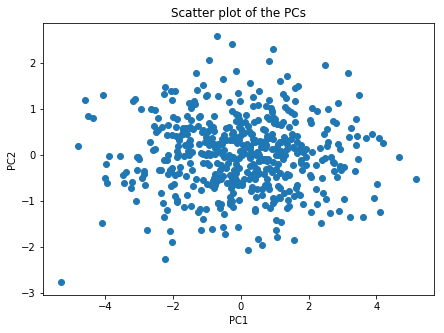

In [3]:
data2D = data2D.drop([16, 156])
meanVector2D = np.mean(data2D)
centeredData2D = data2D - meanVector2D
covarianceMatrix2D = np.cov(centeredData2D.T)
eigenvalues2D, eigenvectors2D = np.linalg.eig(covarianceMatrix2D)
orderedIndices2D = np.argsort(eigenvalues2D)[::-1]
orderedEigenvalues2D = eigenvalues2D[orderedIndices2D]
orderedEigenvectors2D = eigenvectors2D[orderedIndices2D]
pcaData2D = np.dot(centeredData2D, orderedEigenvectors2D)

# Plotting the results.
plt.figure(figsize=(7,5))
plt.scatter(pcaData2D[:,0], pcaData2D[:,1])
plt.title("Scatter plot of the PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The outliers were removed the data looks like one big cluster.

## 3.2 Whitening

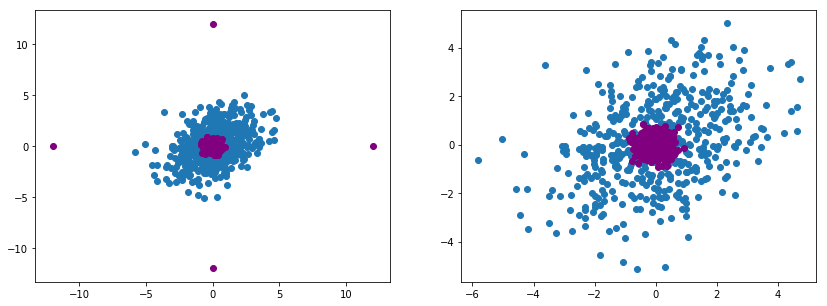

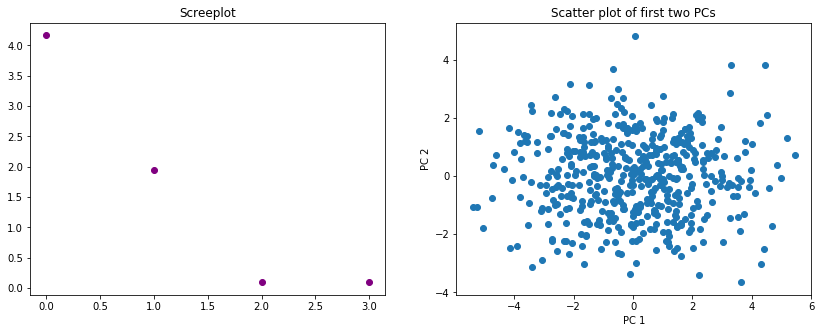

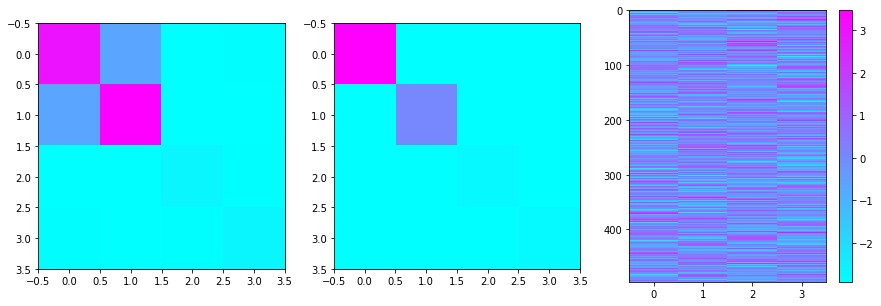

In [101]:
# Load and show outliners
dataWhite = pd.read_csv("pca4.csv", sep=",").as_matrix()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(dataWhite[:,0],dataWhite[:,1])
plt.scatter(dataWhite[:,2],dataWhite[:,3], color='purple')

# Remove outliners
for i in range(495):
    if (abs(dataWhite[:,2][i]) > 10 or abs(dataWhite[:,3][i]) > 10 ):
        dataWhite = np.delete(dataWhite, (i), axis=0)

# reasonable Subset
plt.subplot(1,2,2)
plt.scatter(dataWhite[:,0],dataWhite[:,1])
plt.scatter(dataWhite[:,2],dataWhite[:,3], color='purple')
plt.show()

# PCA
meanVectorWhite = np.mean(dataWhite,axis=0)
centeredDataWhite = dataWhite - meanVectorWhite
covarianceMatrixWhite = np.cov(centeredDataWhite.T)
eigenvaluesWhite, eigenvectorsWhite = np.linalg.eig(covarianceMatrixWhite)
orderedIndicesWhite = np.argsort(eigenvaluesWhite)[::-1]
orderedEigenvaluesWhite = eigenvaluesWhite[orderedIndicesWhite]
orderedEigenvectorsWhite = eigenvectorsWhite[orderedIndicesWhite]
pcaDataWhite = np.dot(centeredDataWhite, orderedEigenvectorsWhite)
np.cov(pcaDataWhite)

# Screeplot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Screeplot")
plt.plot(orderedEigenvaluesWhite, 'o',label="original", color='purple')

# Plotting against two PC.
plt.subplot(1,2,2)
plt.scatter(pcaDataWhite[:,0], pcaDataWhite[:,1])
plt.title("Scatter plot of first two PCs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

#Whiten
X = centeredDataWhite
E = eigenvectorsWhite
L = la.sqrtm(np.linalg.inv(np.diag(eigenvaluesWhite)))
Z = np.dot(np.dot(X,E),L)

#Heat plots
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(covarianceMatrixWhite, cmap="cool")
plt.subplot(1,3,2)
plt.imshow(np.cov(pcaDataWhite.T), cmap="cool")
plt.subplot(1,3,3)
plt.imshow(Z, cmap="cool", aspect='auto')
plt.colorbar()
plt.show()

## 3.3 Derivation of Oja's rule

We are moving out from the following normalization, what was introduced by Oja:

$$ \Large w_i(t+1) = \frac{w_i(t)+\epsilon y(t)x_i(t)}{(\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{\frac{1}{2}}} $$

Taylor expansion with one term:

$$ f(x) = f(x_0) + f'(x-x_0)(x-x_0)$$

After Taylor expanding the right side (using quotient rule):

$$ \small \approx  \left.\frac{w_i(t)}{(\sum_{j=1}^{N} [w_j(t)]^2)^{\frac{1}{2}}} + \frac{ y(t)x_i(t) (\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{\frac{1}{2}} - (w_i(t) + \epsilon y(t)x_i(t)) (\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2)^{-\frac{1}{2}}\sum_{j=1}^{N} 2[w_j(t)+\epsilon y(t)x_j(t))y(t)x_j(t)]}{\sum_{j=1}^{N} [w_j(t)+\epsilon y(t)x_j(t)]^2}\right\vert_{\epsilon=0} \epsilon$$

$$ \small \approx \frac{w_i(t)}{(\sum_{j=1}^{N} w_j(t)^2)^{\frac{1}{2}}} + \frac{ y(t)x_i(t) (\sum_{j=1}^{N} w_j(t)^2)^{\frac{1}{2}} -\frac{1}{2} w_i(t) (\sum_{j=1}^{N} w_j(t)^2)^{-\frac{1}{2}}\sum_{j=1}^{N} 2w_j(t)y(t)x_j(t)}{\sum_{j=1}^{N} w_j(t)^2}\epsilon  $$

Because of the normalization in the previous step we know: $ \sum_{j=1}^{N} w_j(t)^2 = 1 $, therefore:

$$\large = w_i(t) + \epsilon [y(t)x_i(t) - y(t) w_i(t) \sum_{j=1}^{N} w_j(t) x_j(t)] $$

With the definition of y: $ y(t)=\sum_{j=1}^{N} w_j(t) x_j(t)$:

$$\Large w_i(t+1) \approx w_i(t) + \epsilon y(t)[x_i(t) - w_i(t)y(t)] $$

This formula is what we wanted to achieve.